In [4]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

In [2]:
ds = pd.read_csv("../data/preprocessed.csv")

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32828 entries, 0 to 32827
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 32828 non-null  int64  
 1   track_popularity           32828 non-null  int64  
 2   danceability               32828 non-null  float64
 3   energy                     32828 non-null  float64
 4   key                        32828 non-null  int64  
 5   loudness                   32828 non-null  float64
 6   mode                       32828 non-null  int64  
 7   speechiness                32828 non-null  float64
 8   acousticness               32828 non-null  float64
 9   instrumentalness           32828 non-null  float64
 10  liveness                   32828 non-null  float64
 11  valence                    32828 non-null  float64
 12  tempo                      32828 non-null  float64
 13  duration_ms                32828 non-null  int

In [6]:
print(ds.columns)

Index(['Unnamed: 0', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'track_id_encoded',
       'track_name_encoded', 'track_artist_encoded', 'track_album_id_encoded',
       'track_album_name_encoded', 'playlist_name_encoded',
       'playlist_id_encoded', 'playlist_genre_encoded',
       'playlist_subgenre_encoded', 'year'],
      dtype='object')


## Feature Importance

Feature ranking:
1. mode (0.007956)
2. key (0.027671)
3. liveness (0.044104)
4. track_album_name_encoded (0.044913)
5. track_artist_encoded (0.045297)
6. instrumentalness (0.046076)
7. loudness (0.049521)
8. valence (0.056403)
9. track_popularity (0.056791)
10. acousticness (0.060037)
11. duration_ms (0.060295)
12. energy (0.083105)
13. danceability (0.094162)
14. year (0.099975)
15. speechiness (0.106192)
16. tempo (0.117502)


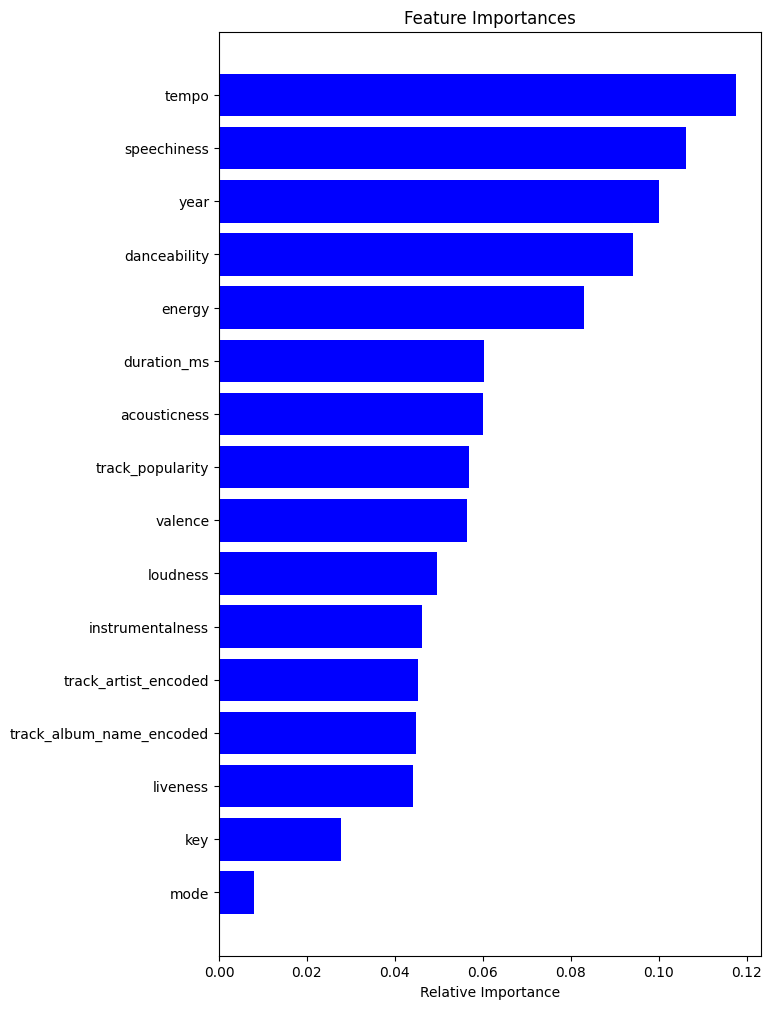

In [29]:
# remove features that could give us waaaaay too much information
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
importances = cl.feature_importances_
indices = np.argsort(importances)

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Classifiers

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [31]:
y_column = 'playlist_genre_encoded'
X_columns = ['track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms',
       'track_artist_encoded', 'track_album_name_encoded', 'year']
X = ds[X_columns]
y = ds[y_column]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1717)

In [51]:
models = {
    'SVC' : SVC(),
    'GradientBoostingClassifier': GradientBoostingClassifier(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'AdaBoostClassifier': AdaBoostClassifier(), 
    'RandomForestClassifier': RandomForestClassifier()
}

In [52]:
def classification_report(models):
    for name, model in models.items():
        print(name)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(metrics.classification_report(y_test, y_pred))
        print('\n')

In [53]:
classification_report(models)

SVC


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.26      0.33      0.29      1801
           1       0.00      0.00      0.00      1533
           2       0.21      0.59      0.31      1692
           3       0.23      0.28      0.25      1670
           4       0.49      0.07      0.12      1707
           5       0.23      0.08      0.12      1446

    accuracy                           0.23      9849
   macro avg       0.24      0.23      0.18      9849
weighted avg       0.24      0.23      0.19      9849



GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1801
           1       0.52      0.48      0.50      1533
           2       0.44      0.45      0.45      1692
           3       0.57      0.49      0.52      1670
           4       0.61      0.68      0.64      1707
           5       0.75      0.77      0.76      1446

    accuracy                           0.60     

## Model Validation

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

[[1303  111  231   41   88   27]
 [ 143  737  275  125  204   49]
 [ 264  196  756  200  125  151]
 [  58  166  203  816  314  113]
 [  86  160  107  169 1153   32]
 [  53   39  130   90   17 1117]]


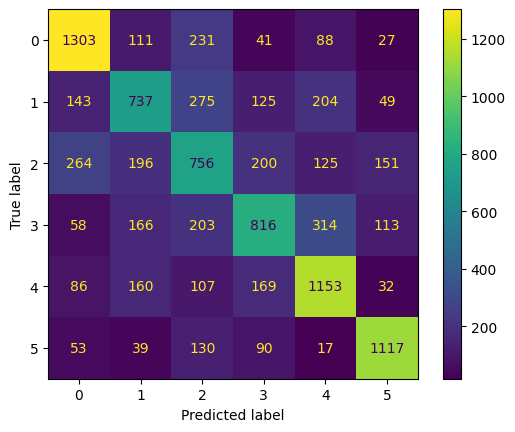

In [55]:
classifier = models['GradientBoostingClassifier'] #GradientBoostingClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

##### accuracy

In [56]:
y_pred = classifier.predict(X_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('Presicion score: ', metrics.precision_score(y_test, y_pred, average=None))
print('Recall score: ', metrics.recall_score(y_test, y_pred, average=None))
print('F1 score: ', metrics.f1_score(y_test, y_pred, average=None))


Accuracy score:  0.5972179916742817
Presicion score:  [0.68327216 0.523066   0.44418331 0.56627342 0.60652288 0.7501679 ]
Recall score:  [0.72348695 0.48075669 0.44680851 0.48862275 0.67545401 0.7724758 ]
F1 score:  [0.70280475 0.50101971 0.44549204 0.52459016 0.63913525 0.76115843]


In [57]:
X = ds[X_columns]
y = ds[y_column]

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [58]:
def eval_models(models, X_train, y_train, X_valid, X_test):
    classifiers = dict()
    for name, model in models.items():
        print('training ',name)
        classifier = model
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        print('test set metrics: ', metrics.classification_report(y_test, y_pred))
        y_pred = classifier.predict(X_valid)
        print('validation set metrics: ', metrics.classification_report(y_valid, y_pred))
        classifiers[name] = classifier


In [59]:
eval_models(models, X_train, y_train, X_valid, X_test)

training  SVC


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


test set metrics:                precision    recall  f1-score   support

           0       0.26      0.33      0.29       607
           1       0.00      0.00      0.00       490
           2       0.22      0.64      0.33       556
           3       0.25      0.31      0.27       572
           4       0.68      0.08      0.15       550
           5       0.31      0.10      0.15       508

    accuracy                           0.25      3283
   macro avg       0.29      0.24      0.20      3283
weighted avg       0.29      0.25      0.21      3283



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


validation set metrics:                precision    recall  f1-score   support

           0       0.26      0.31      0.29       616
           1       0.00      0.00      0.00       527
           2       0.21      0.63      0.31       547
           3       0.21      0.27      0.24       536
           4       0.52      0.08      0.13       585
           5       0.24      0.07      0.11       472

    accuracy                           0.23      3283
   macro avg       0.24      0.23      0.18      3283
weighted avg       0.25      0.23      0.18      3283

training  GradientBoostingClassifier
test set metrics:                precision    recall  f1-score   support

           0       0.68      0.70      0.69       607
           1       0.49      0.46      0.48       490
           2       0.43      0.44      0.44       556
           3       0.55      0.47      0.51       572
           4       0.58      0.64      0.61       550
           5       0.76      0.78      0.77       5

## Feature Importances

In [60]:
def feat_impo(models):
    for name, model in models.items():
        importances = model.feature_importances_
        indices = np.argsort(importances)
        print("Feature ranking")
        
        plt.figure(figsize=(5, 10))
        plt.title(f'Feature Importances {name}')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
        plt.xlabel('Relative Importance')

Feature ranking
Feature ranking
Feature ranking
Feature ranking


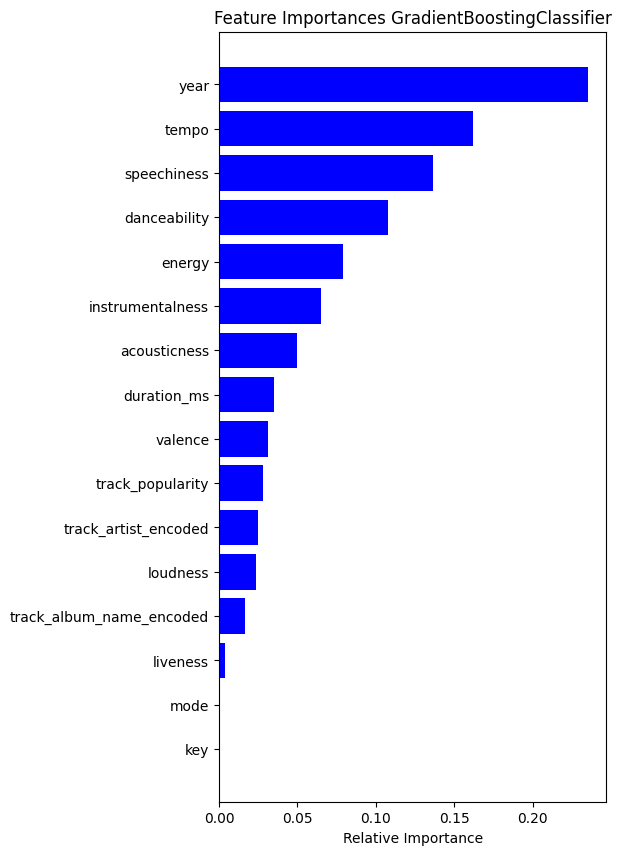

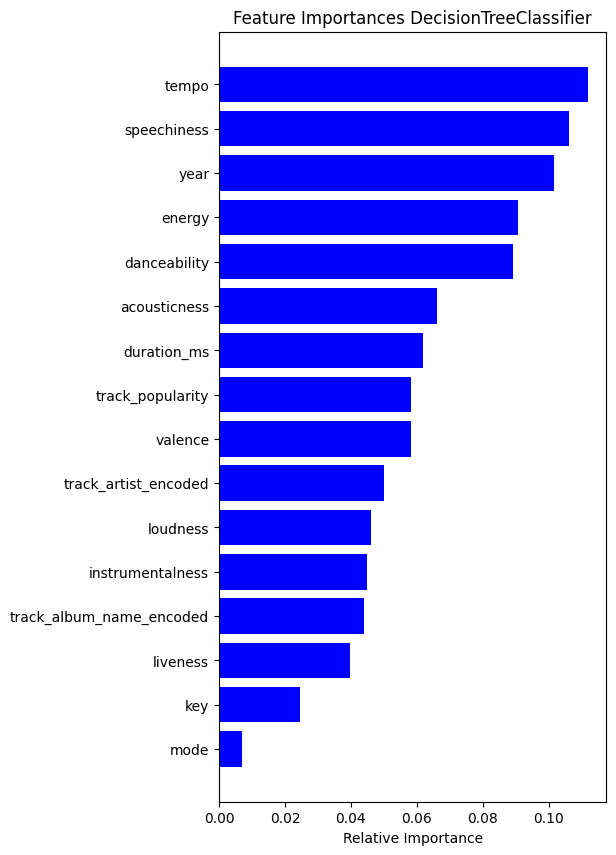

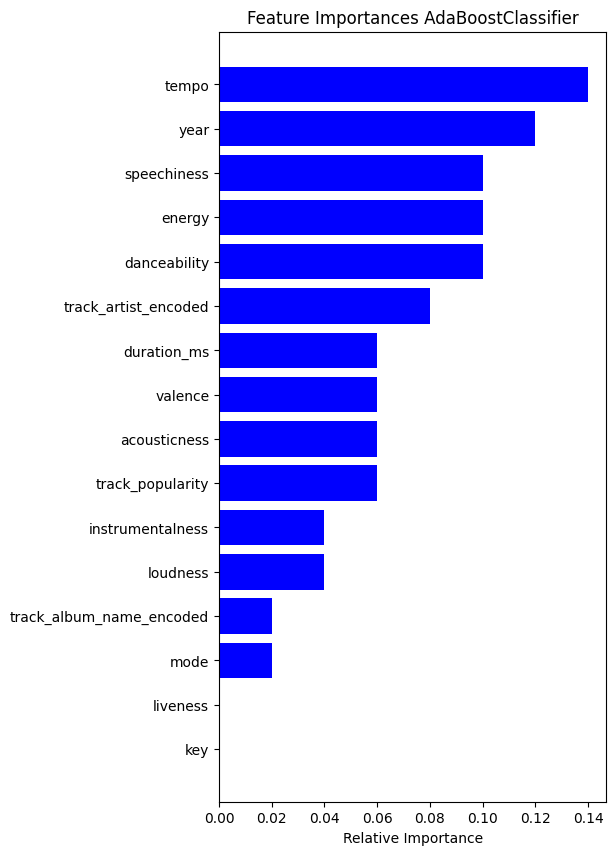

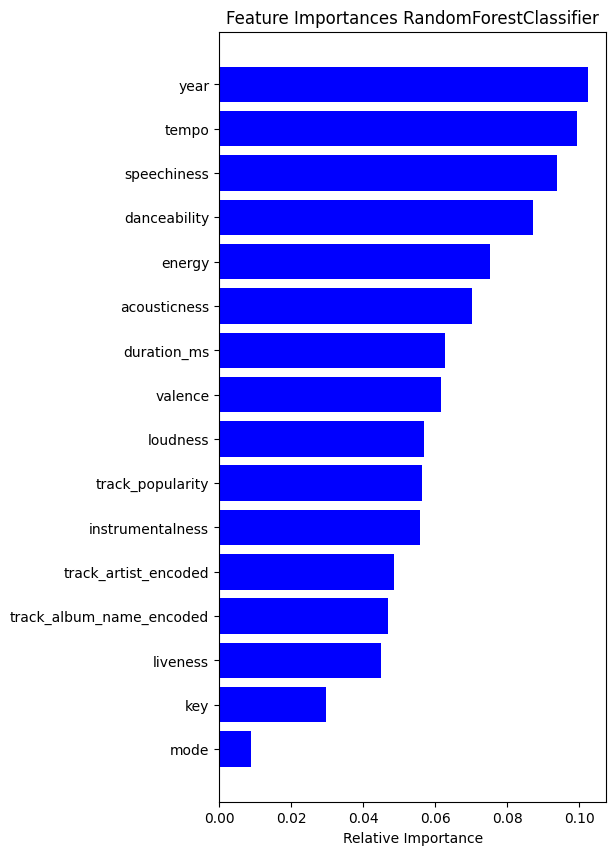

In [63]:
feat_impo(models)

In [64]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1717)
for train_index, test_index in ss.split(X):
    classifier = GradientBoostingClassifier()
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('k-fold set metrics: ', metrics.classification_report(y.iloc[test_index], y_pred))

k-fold set metrics:                precision    recall  f1-score   support

           0       0.69      0.70      0.70      1227
           1       0.50      0.44      0.47      1016
           2       0.42      0.45      0.43      1093
           3       0.55      0.50      0.52      1075
           4       0.62      0.67      0.64      1163
           5       0.75      0.78      0.76       992

    accuracy                           0.59      6566
   macro avg       0.59      0.59      0.59      6566
weighted avg       0.59      0.59      0.59      6566

k-fold set metrics:                precision    recall  f1-score   support

           0       0.67      0.71      0.69      1243
           1       0.50      0.44      0.47      1012
           2       0.42      0.43      0.43      1119
           3       0.56      0.48      0.51      1094
           4       0.59      0.68      0.63      1112
           5       0.75      0.76      0.75       986

    accuracy                       